In [1]:
%matplotlib inline

import sys 
import os 
import copy 
import numpy as np

nb_dir = os.getcwd()
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from plotlib.loaders import *
from plotlib.plotters import *

from phdconf import config 

ylims=[0.67, 0.45, 0.57, 0.51, 0.38]

In [2]:
qrels = {}
total = 0
with open('/home/danlocke/go/src/github.com/dan-locke/phd-data/aus/filtered-qrels.txt') as f:
    for line in f:
        parts = line.split()
        if parts[0] not in qrels:
            qrels[parts[0]] = [[], []]
        if parts[3] == '0':
            qrels[parts[0]][0].append(parts[2])
        else:
            qrels[parts[0]][1].append(parts[2])
            
        total +=1

In [6]:
# for assess in qrels: 
#     for topic in qrels[assess]:
#         total[assess] += len(qrels[assess][topic])

In [7]:
print(total)

10732


In [8]:
from plotlib.loaders import *
from phdconf import config 

In [9]:
queries = load_queries(config.AUS_TOPIC_PATH)

In [10]:
# queries
leg_queries = load_queries('/home/danlocke/go/src/github.com/dan-locke/phd-data/all-leg-queries.json')

In [10]:
def totals(qrels, topics):
    rel = 0
    non_rel = 0
    for t in topics:
        rel += len(qrels[str(t)][1])
        non_rel += len(qrels[str(t)][0])
        
    return non_rel/len(topics), rel/len(topics)

totals(qrels, queries)

(85.7578947368421, 10.578947368421053)

In [11]:
totals(qrels, leg_queries)

(74.07142857142857, 10.928571428571429)

9150.4

In [1]:
# import everything as needed
%matplotlib inline


from typing import List 
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D, axes3d
from matplotlib import cm
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import math
import csv
import re
import string
from matplotlib.artist import setp
import subprocess
import os
import copy

from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('png')

#Set general plot properties
sns.set()
# sns.set_context("paper")
sns.set_color_codes("pastel")

sns.set_context({"figure.figsize": (16, 10)})
# plt.style.use('grayscale')
plt.style.use('seaborn-white')

In [2]:

def read_doc_len_file(path: str): 
    lens = []
    with open(path) as f: 
        for line in f:
            lens.append(int(line.strip()))
            
    return lens 



In [4]:


# # These doc lens are generated from pre-stopped indices

# root_path = "/home/danlocke/phd-generated/"
# # dirs = ['aus', 'aus', 'sigir']

# # index_display_names = ('AUS', 'FILTERED', 'SIGIR')
# index_names = ['flattened', 'filtered', 'sigir']
# doc_lens = []
# stopped_lens = []
# stop_prefixes = ['para-filstop']

# for i in range(len(stop_prefixes)): 
#     for in_name in index_names: 
#         if i % 2 == 0:
#             stopped_lens.append(read_doc_len_file(os.path.join(root_path, "{0}-doc_lens.txt".format(stop_prefixes[i]))))
#         else:
#             doc_lens.append(read_doc_len_file(os.path.join(root_path, "{0}{1}-doc_lens.txt".format(stop_prefixes[i], in_name))))


IndexError: list index out of range

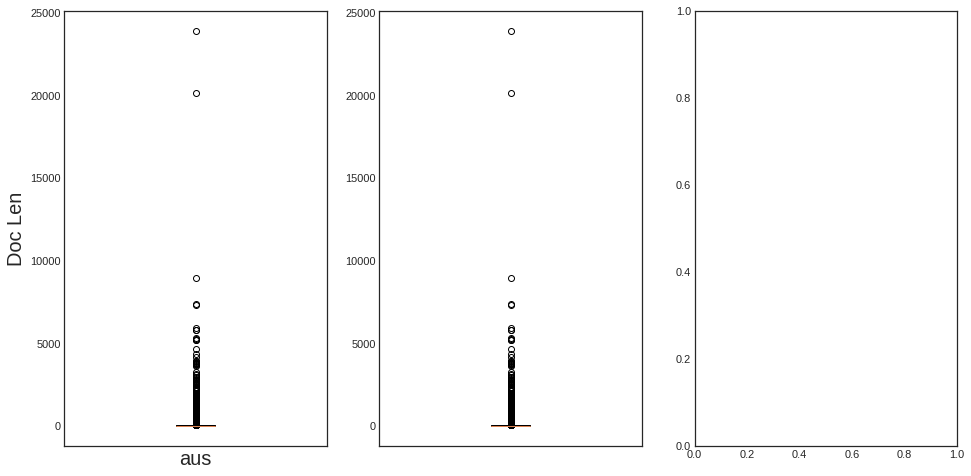

In [29]:
index_display_names = ['aus']
plot_bar_whisker_lens(stopped_lens, index_display_names)

In [11]:
BASE_DIR = os.path.join(os.environ["HOME"], 'phd-generated')
path = os.path.join(BASE_DIR, 'bert-rerank')

interped_dfs = []

inter = Interpolater(os.path.join(BASE_DIR, 'preprocessing', 'dirichlet_prior', 'case-topics-filtered-phrasestop-unigram_dir_mu_1050.00.run'))
for _lambda in np.arange(0, 1.01, 0.01):
    inter.interpolate(os.path.join(path, 'case-topics-tinybert-nrm-sum-5.run'), _lambda, 'tmp.run')
    interped_dfs.append(load_dfs(config.AUS_QREL_PATH, config.AUS_REL_LEVEL, '', ['tmp.run'], per_query=True)[0])

In [12]:
tt_folds = read_folds('ausnl-folds.txt')

In [13]:
file_path = '/home/danlocke/go/src/github.com/dan-locke/phd/para-lens/para-filstop-rel-lens.txt'

In [14]:
def read_rel_para_file(path: str):
    rel = []
    non_rel = []
    with open(path) as f:
        for line in f:
            parts = line.split()
            if parts[1] == '0':
                non_rel.append(int(parts[0]))
            else:
                rel.append(int(parts[0]))
    return rel, non_rel

rel, non_rel = read_rel_para_file(file_path)

In [15]:
def plot_bar_whisker_lens(lens, names):
    fig, axs = plt.subplots(1, 1)
    fig.set_size_inches(16, 4)
    axs.set_ylabel('Len', fontsize='20')
    bp = axs.boxplot(lens)
    axs.set_xticklabels(names, fontsize='20')
    axs.axhline(y=350, xmin=0.0, xmax=1.0, linestyle='--', linewidth=1.0, color='grey')
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['medians'], color='b')
        
    return fig 

para_len_fig = plot_bar_whisker_lens([rel, non_rel], ['Relevant', 'Not relevant'])
para_len_fig.savefig('figures/para-lens.pdf')

<Figure size 1152x288 with 1 Axes>

In [27]:
print(len([x for x in rel if x > 350]))
print(len([x for x in non_rel if x > 350]))
print(len(rel))
print(len(non_rel))

16
332
38117
1116453


In [16]:
total = 0
for n in rel:
    total += n
for n in non_rel: 
    total += n

print(float(total)/float(len(rel)+ len(non_rel)))

25.91130810604814


In [3]:

def count_lines(path: str) -> int: 
    lines = 0
    with open(path) as f: 
        for line in f:
            lines += 1
            
    return lines

count_lines('/home/danlocke/go/src/github.com/dan-locke/phd-data/generated/flattened-doc_lens.txt')



47176

In [5]:
count_lines('/home/danlocke/go/src/github.com/dan-locke/phd-data/generated/prestop-flattened-doc_lens.txt')

47176

In [6]:
import json 
# number tokens in ussc queries

l = 0
c = 0
with open('/home/danlocke/go/src/github.com/dan-locke/phd-data/sigir/sigir-topic-topics.json') as f:
    data = json.load(f)
    for topic in data['topics']:
        l += len(topic['topic'].split())
        c += 1
    

In [8]:
l / c

52.916666666666664